In [79]:
import numpy as np 

In [80]:
seq_length = 100
model_len = 512
pos_embed = np.zeros((seq_length,model_len))
for pos in range(seq_length):
    for i in range(0,model_len,2):
        pos_embed[pos,i] = np.sin(pos/(10000**((2*i)/model_len)))
        pos_embed[pos,i+1] = np.cos(pos/(10000**((2*i)/model_len)))

pos_embed.shape


(100, 512)

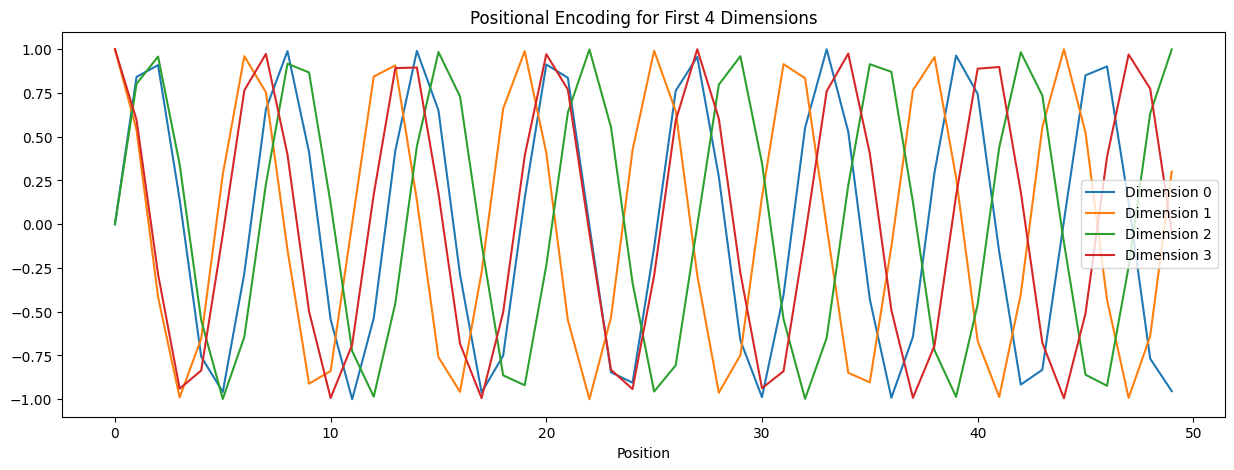

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def get_positional_encoding(seq_len, d_model):
    positional_encoding = np.zeros((seq_len, d_model))
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            positional_encoding[pos, i] = np.sin(pos / (10000 ** ((2 * i) / d_model)))
            positional_encoding[pos, i + 1] = np.cos(pos / (10000 ** ((2 * i) / d_model)))
    return positional_encoding

# Example usage
seq_len = 10000  # Length of the sequence
d_model = 512 # Dimension of the model
pos_encoding = get_positional_encoding(seq_len, d_model)

# Plotting positional encodings for visualization
plt.figure(figsize=(15, 5))
plt.plot(pos_encoding[:50, 0], label='Dimension 0')
plt.plot(pos_encoding[:50, 1], label='Dimension 1')
plt.plot(pos_encoding[:50, 2], label='Dimension 2')
plt.plot(pos_encoding[:50, 3], label='Dimension 3')
plt.legend()
plt.xlabel('Position')
plt.title('Positional Encoding for First 4 Dimensions')
plt.show()


In [82]:
np.array_equal(pos_embed,pos_encoding)

False

In [83]:
pos_embed.shape

(100, 512)

In [84]:
pos_encoding.shape

(10000, 512)

In [15]:
import torch 
import torch.nn as nn
import torch.nn.functional  as F

In [19]:
torch.manual_seed(69)
x = torch.randn(6,32)

class FFN(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(32,2024)
        self.out = nn.Linear(2024,32)

    def forward(self , x):
        return  F.softmax(self.out(torch.relu(self.l1(x))),dim=1)

ff = FFN()

ff.forward(x)
    

tensor([[0.0254, 0.0300, 0.0296, 0.0232, 0.0191, 0.0220, 0.0286, 0.0441, 0.0445,
         0.0337, 0.0271, 0.0257, 0.0307, 0.0409, 0.0250, 0.0248, 0.0202, 0.0510,
         0.0252, 0.0363, 0.0473, 0.0315, 0.0436, 0.0344, 0.0347, 0.0213, 0.0217,
         0.0271, 0.0306, 0.0464, 0.0271, 0.0275],
        [0.0267, 0.0271, 0.0279, 0.0335, 0.0310, 0.0238, 0.0299, 0.0374, 0.0387,
         0.0322, 0.0266, 0.0397, 0.0328, 0.0375, 0.0371, 0.0235, 0.0280, 0.0433,
         0.0206, 0.0351, 0.0347, 0.0389, 0.0276, 0.0239, 0.0328, 0.0230, 0.0221,
         0.0273, 0.0343, 0.0451, 0.0311, 0.0268],
        [0.0310, 0.0313, 0.0244, 0.0272, 0.0256, 0.0195, 0.0189, 0.0408, 0.0282,
         0.0459, 0.0420, 0.0320, 0.0355, 0.0360, 0.0199, 0.0261, 0.0264, 0.0516,
         0.0215, 0.0306, 0.0499, 0.0356, 0.0231, 0.0290, 0.0376, 0.0183, 0.0265,
         0.0385, 0.0266, 0.0422, 0.0329, 0.0253],
        [0.0416, 0.0306, 0.0210, 0.0305, 0.0218, 0.0311, 0.0286, 0.0371, 0.0277,
         0.0230, 0.0302, 0.0331, 0.0308,